# Ecommerce Fraud Detection 

### Data cleaning and Exploratory Data Analysis

In [58]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("C:\\Users\Anurag Sen\Desktop\Ecommerce Fraud dataset.csv")
data.head(10)

,Unnamed: 0,index,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,...,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,Trns_fail_order_fulfilled,Duplicate_IP,Fraud_Decoded,Duplicate_Address
0,0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,...,0,0,0,0,0,0,1,0,1,0
2,2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,...,0,0,0,0,0,0,2,0,0,0
3,3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,...,3,0,0,0,0,0,0,0,0,0
4,4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,...,0,1,0,0,0,0,2,0,1,0
5,5,5,robinsoncynthia@dunn.com,+65(5)8997489788,hbww39m1wenbq4ymjhsx,43.166.163.164,"65233 Hutchinson Mountains\nMartinezside, OR 7...",1,1,2,...,0,0,0,0,0,0,0,0,1,0
6,6,6,samuel15@saunders-rhodes.com,05045239487,up7afvce5v0omniqlevq,33.67.35.30,"3960 Emily Fort\nStaceytown, AR 21817-3325",2,1,2,...,0,2,0,0,0,0,1,0,1,0
7,7,7,johnlowery@gmail.com,044-642-9860,rjb0adai34izqvys4938,212.144.68.190,"484 Pamela Pass\nLake Jessicaview, WI 12942-9074",6,5,2,...,3,0,5,0,0,0,5,0,1,0
8,8,8,jameslandry@rodriguez.com,1-885-168-1310x338,yz4l2bgbvzra5eb5qcan,c899:ff67:6864:4365:def3:3023:655f:5181,USNS Price\nFPO AE 14661,5,2,1,...,0,0,0,0,0,0,0,0,0,0
9,9,10,bowenwilliam@yahoo.com,(128)248-4091x37789,qmntgod0numz62gzbla7,231.91.253.19,"27061 Wright Forks\nCraigland, MN 59915",6,5,1,...,0,0,0,0,0,0,2,0,1,0


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 143 non-null    int64 
 1   index                      143 non-null    int64 
 2   customerEmail              143 non-null    object
 3   customerPhone              143 non-null    object
 4   customerDevice             143 non-null    object
 5   customerIPAddress          143 non-null    object
 6   customerBillingAddress     143 non-null    object
 7   No_Transactions            143 non-null    int64 
 8   No_Orders                  143 non-null    int64 
 9   No_Payments                143 non-null    int64 
 10  Fraud                      143 non-null    bool  
 11  Total_transaction_amt      143 non-null    int64 
 12  No_transactionsFail        143 non-null    int64 
 13  PaymentRegFail             143 non-null    int64 
 14  PaypalPaym

In [60]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [61]:
data.head(10)

,index,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,...,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,Trns_fail_order_fulfilled,Duplicate_IP,Fraud_Decoded,Duplicate_Address
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,...,0,0,0,0,0,0,0,0,0,0
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,...,0,0,0,0,0,0,1,0,1,0
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,...,0,0,0,0,0,0,2,0,0,0
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False,...,3,0,0,0,0,0,0,0,0,0
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True,...,0,1,0,0,0,0,2,0,1,0
5,5,robinsoncynthia@dunn.com,+65(5)8997489788,hbww39m1wenbq4ymjhsx,43.166.163.164,"65233 Hutchinson Mountains\nMartinezside, OR 7...",1,1,2,True,...,0,0,0,0,0,0,0,0,1,0
6,6,samuel15@saunders-rhodes.com,05045239487,up7afvce5v0omniqlevq,33.67.35.30,"3960 Emily Fort\nStaceytown, AR 21817-3325",2,1,2,True,...,0,2,0,0,0,0,1,0,1,0
7,7,johnlowery@gmail.com,044-642-9860,rjb0adai34izqvys4938,212.144.68.190,"484 Pamela Pass\nLake Jessicaview, WI 12942-9074",6,5,2,True,...,3,0,5,0,0,0,5,0,1,0
8,8,jameslandry@rodriguez.com,1-885-168-1310x338,yz4l2bgbvzra5eb5qcan,c899:ff67:6864:4365:def3:3023:655f:5181,USNS Price\nFPO AE 14661,5,2,1,False,...,0,0,0,0,0,0,0,0,0,0
9,10,bowenwilliam@yahoo.com,(128)248-4091x37789,qmntgod0numz62gzbla7,231.91.253.19,"27061 Wright Forks\nCraigland, MN 59915",6,5,1,True,...,0,0,0,0,0,0,2,0,1,0


In [62]:
data.columns

Index(['index', 'customerEmail', 'customerPhone', 'customerDevice',
       'customerIPAddress', 'customerBillingAddress', 'No_Transactions',
       'No_Orders', 'No_Payments', 'Fraud', 'Total_transaction_amt',
       'No_transactionsFail', 'PaymentRegFail', 'PaypalPayments',
       'ApplePayments', 'CardPayments', 'BitcoinPayments', 'OrdersFulfilled',
       'OrdersPending', 'OrdersFailed', 'JCB_16', 'AmericanExp', 'VISA_16',
       'Discover', 'Voyager', 'VISA_13', 'Maestro', 'Mastercard', 'DC_CB',
       'JCB_15', 'Trns_fail_order_fulfilled', 'Duplicate_IP', 'Fraud_Decoded',
       'Duplicate_Address'],
      dtype='object')

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   index                      143 non-null    int64 
 1   customerEmail              143 non-null    object
 2   customerPhone              143 non-null    object
 3   customerDevice             143 non-null    object
 4   customerIPAddress          143 non-null    object
 5   customerBillingAddress     143 non-null    object
 6   No_Transactions            143 non-null    int64 
 7   No_Orders                  143 non-null    int64 
 8   No_Payments                143 non-null    int64 
 9   Fraud                      143 non-null    bool  
 10  Total_transaction_amt      143 non-null    int64 
 11  No_transactionsFail        143 non-null    int64 
 12  PaymentRegFail             143 non-null    int64 
 13  PaypalPayments             143 non-null    int64 
 14  ApplePayme

In [64]:
data.describe()

,index,No_Transactions,No_Orders,No_Payments,Total_transaction_amt,No_transactionsFail,PaymentRegFail,PaypalPayments,ApplePayments,CardPayments,...,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,Trns_fail_order_fulfilled,Duplicate_IP,Fraud_Decoded,Duplicate_Address
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,83.874126,4.356643,3.342657,2.272727,201.300699,1.468531,0.573427,0.384615,0.342657,4.524476,...,0.573427,0.405594,0.727273,0.223776,0.405594,0.314685,1.195804,0.083916,0.391608,0.041958
std,49.719051,2.527052,1.716141,2.185683,234.751263,1.860653,1.646548,0.956248,1.068795,5.478295,...,1.258713,1.440059,1.606246,0.851011,1.464307,1.365674,1.534848,0.496417,0.489826,0.287635
min,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.500000,2.000000,2.000000,1.000000,76.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,85.000000,4.000000,3.000000,2.000000,133.000000,1.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,127.000000,6.000000,4.000000,3.000000,208.000000,2.000000,0.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,167.000000,15.000000,8.000000,15.000000,1033.000000,12.000000,13.000000,5.000000,7.000000,24.000000,...,6.000000,13.000000,6.000000,6.000000,15.000000,11.000000,6.000000,3.000000,1.000000,2.000000


In [65]:
corr = data.corr()
corr

,index,No_Transactions,No_Orders,No_Payments,Fraud,Total_transaction_amt,No_transactionsFail,PaymentRegFail,PaypalPayments,ApplePayments,...,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,Trns_fail_order_fulfilled,Duplicate_IP,Fraud_Decoded,Duplicate_Address
index,1.000000,0.055289,0.071241,0.029415,0.094282,0.032512,0.008711,0.049835,0.094638,0.007179,...,0.044035,0.150222,0.015881,-0.006486,0.151410,0.011374,-0.018777,0.016695,0.094282,-0.024250
No_Transactions,0.055289,1.000000,0.833884,0.095741,0.074120,0.327495,0.564799,0.280537,0.053577,0.116092,...,0.063663,0.343132,0.051891,0.100162,0.341257,0.252930,0.522933,0.060181,0.074120,-0.040109
No_Orders,0.071241,0.833884,1.000000,0.211471,0.199480,0.329055,0.214019,0.263930,0.073612,0.173579,...,0.081184,0.265368,0.085235,0.072498,0.059203,0.203064,0.247054,0.065206,0.199480,-0.029331
No_Payments,0.029415,0.095741,0.211471,1.000000,0.327098,-0.031825,-0.092249,-0.041805,-0.067388,0.077283,...,-0.031648,0.065291,-0.068931,0.016177,0.070811,-0.050188,-0.053817,0.212416,0.327098,0.205703
Fraud,0.094282,0.074120,0.199480,0.327098,1.000000,0.421429,0.152701,0.042681,-0.098305,0.037815,...,0.238585,0.102699,0.091948,-0.008979,-0.026640,-0.038134,0.197037,0.211441,1.000000,0.182458
Total_transaction_amt,0.032512,0.327495,0.329055,-0.031825,0.421429,1.000000,0.737983,0.075124,0.120198,0.003207,...,0.420993,0.099649,0.587123,-0.019234,0.051556,0.085393,0.735455,-0.040827,0.421429,-0.050875
No_transactionsFail,0.008711,0.564799,0.214019,-0.092249,0.152701,0.737983,1.000000,0.120864,0.076115,-0.035264,...,0.311456,0.225570,0.412999,0.017821,0.353655,0.124480,0.929363,-0.019994,0.152701,-0.063308
PaymentRegFail,0.049835,0.280537,0.263930,-0.041805,0.042681,0.075124,0.120864,1.000000,-0.100807,-0.020400,...,-0.091815,0.536802,-0.068262,-0.062066,0.057661,-0.080813,0.161466,0.069950,0.042681,0.008319
PaypalPayments,0.094638,0.053577,0.073612,-0.067388,-0.098305,0.120198,0.076115,-0.100807,1.000000,-0.019611,...,0.037805,0.034224,0.174226,-0.019970,-0.026694,-0.044800,0.058685,0.020541,-0.098305,-0.059085
ApplePayments,0.007179,0.116092,0.173579,0.077283,0.037815,0.003207,-0.035264,-0.020400,-0.019611,1.000000,...,-0.105206,0.023453,0.054819,-0.022957,0.122059,-0.059921,-0.058360,-0.014758,0.037815,-0.001282


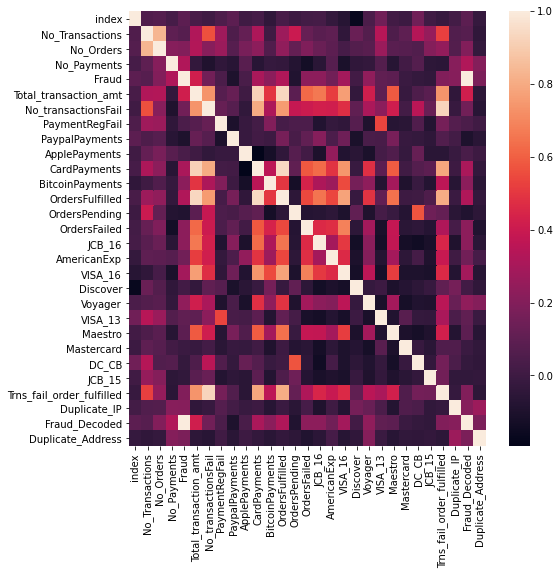

In [66]:
plt.figure(figsize=(8,8))
sns.heatmap(corr)

In [67]:
data['Fraud']

0      False
1       True
2      False
3      False
4       True
       ...  
138     True
139     True
140     True
141     True
142    False
Name: Fraud, Length: 143, dtype: bool

In [68]:
data['Fraud'].unique()

array([False,  True])

In [69]:
data['Fraud'].value_counts()

False    87
True     56
Name: Fraud, dtype: int64

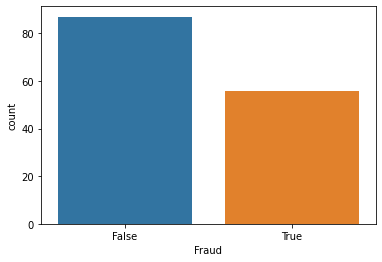

In [70]:
sns.countplot(data['Fraud'])

### Model Designing 

In [71]:
data

,index,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,...,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,Trns_fail_order_fulfilled,Duplicate_IP,Fraud_Decoded,Duplicate_Address
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,...,0,0,0,0,0,0,0,0,0,0
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,...,0,0,0,0,0,0,1,0,1,0
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,...,0,0,0,0,0,0,2,0,0,0
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False,...,3,0,0,0,0,0,0,0,0,0
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True,...,0,1,0,0,0,0,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,163,mitchellvickie@brewer-jones.com,313-124-3836x3528,ecu7ezz0ue67v3fce1o3,181.90.104.120,"829 Ramirez Dam Suite 648\nGatesview, OR 55669...",3,3,1,True,...,0,0,0,0,0,0,0,0,1,0
139,164,sbrown@hughes.biz,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,"9472 Pacheco Islands Suite 940\nDrewburgh, AZ ...",6,5,3,True,...,5,0,0,0,0,0,1,0,1,0
140,165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2,True,...,3,0,5,0,0,0,5,0,1,0
141,166,ethompson@jackson-sanders.com,962.300.2250,navessqcnmc9csfjn5cj,203.246.172.244,"16953 Jennifer Springs\nKathybury, IL 02095-3215",8,6,6,True,...,3,0,1,0,0,0,2,0,1,0


In [72]:
data['Fraud_Decoded']

0      0
1      1
2      0
3      0
4      1
      ..
138    1
139    1
140    1
141    1
142    0
Name: Fraud_Decoded, Length: 143, dtype: int64

In [73]:
X = data.drop(["Fraud","Mastercard","JCB_16","JCB_15","DC_CB","ApplePayments","PaymentRegFail","Discover","Duplicate_IP","VISA_13","OrdersFailed","OrdersPending","PaypalPayments","Duplicate_Address","Trns_fail_order_fulfilled","Voyager","Maestro","Fraud_Decoded","index","customerEmail","customerPhone","customerDevice","customerIPAddress","customerBillingAddress"],axis=1)
X

,No_Transactions,No_Orders,No_Payments,Total_transaction_amt,No_transactionsFail,CardPayments,BitcoinPayments,OrdersFulfilled,AmericanExp,VISA_16
0,2,2,1,44,0,2,0,1,0,0
1,3,3,7,111,1,0,3,3,2,1
2,5,3,2,131,2,5,0,4,0,0
3,3,3,1,85,0,3,0,3,0,0
4,7,7,6,411,2,4,0,6,1,2
...,...,...,...,...,...,...,...,...,...,...
138,3,3,1,126,0,3,0,2,0,0
139,6,5,3,149,1,6,0,6,0,0
140,4,4,2,1033,6,24,3,25,3,10
141,8,6,6,378,2,6,2,7,2,0


In [74]:
y = data['Fraud_Decoded']
y

0      0
1      1
2      0
3      0
4      1
      ..
138    1
139    1
140    1
141    1
142    0
Name: Fraud_Decoded, Length: 143, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [76]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)   
X_test = ss.transform(X_test) 

## Machine Learning Models 

### 1. Decision Tree Classifier 

In [77]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini')
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [78]:
y_pred = dtc.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
      dtype=int64)

Percentile Accuracy of Decision Tree Classifier is:  76.74418604651163


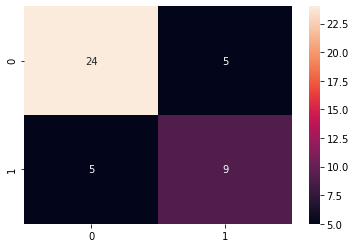

In [79]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Percentile Accuracy of Decision Tree Classifier is: ", accuracy_score(y_test, y_pred)*100)
sns.heatmap(data = confusion_matrix(y_test,y_pred),annot = True)

In [80]:
results = pd.DataFrame()   #creating an empty data frame
results

""


In [81]:
tempResults = pd.DataFrame({'Algorithm':['Decision Tree Classifier'], 'Accuracy':[accuracy_score(y_test, y_pred)]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision Tree Classifier,0.767442


### 2. Random Forest Classifier 

In [82]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion="gini",n_estimators = 1000,random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [83]:
y_pred = rfc.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

Percentile Accuracy of Random Forest Classifier is:  83.72093023255815


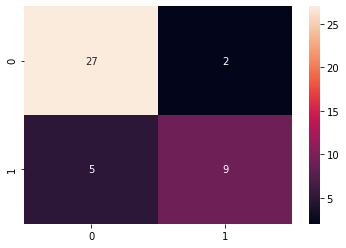

In [84]:
from sklearn.metrics import accuracy_score
print("Percentile Accuracy of Random Forest Classifier is: ",accuracy_score(y_test, y_pred)*100)
sns.heatmap(data = confusion_matrix(y_test,y_pred),annot = True)

In [85]:
tempResults = pd.DataFrame({'Algorithm':['Random Forest Classifier Method'], 'Accuracy':[accuracy_score(y_test, y_pred)]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision Tree Classifier,0.767442
0,Random Forest Classifier Method,0.837209


### 3. Support Vector Machines 

In [86]:
from sklearn import svm
svc = svm.SVC()
svc.fit(X_train, y_train)

SVC()

In [87]:
y_pred = svc.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

Percentile Accuracy of SVM is:  72.09302325581395


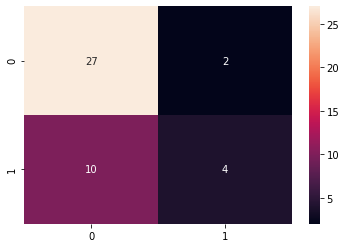

In [88]:
from sklearn.metrics import accuracy_score
print("Percentile Accuracy of SVM is: ",accuracy_score(y_test, y_pred)*100)
sns.heatmap(data = confusion_matrix(y_test,y_pred),annot = True)

In [89]:
tempResults = pd.DataFrame({'Algorithm':['Support Vector Machines'], 'Accuracy':[accuracy_score(y_test, y_pred)]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision Tree Classifier,0.767442
0,Random Forest Classifier Method,0.837209
0,Support Vector Machines,0.720930


### 4. Logistic Regression 

In [90]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [91]:
y_pred = lr.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1],
      dtype=int64)

Percentile Accuracy of logistic regression is:  69.76744186046511


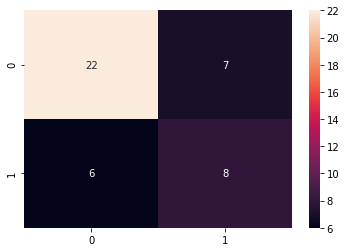

In [92]:
from sklearn.metrics import accuracy_score
print("Percentile Accuracy of logistic regression is: " , accuracy_score(y_test, y_pred)*100)
sns.heatmap(data = confusion_matrix(y_test,y_pred),annot = True)

In [93]:
tempResults = pd.DataFrame({'Algorithm':['Logistic Regression'], 'Accuracy':[accuracy_score(y_test, y_pred)]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision Tree Classifier,0.767442
0,Random Forest Classifier Method,0.837209
0,Support Vector Machines,0.720930
0,Logistic Regression,0.697674


### 5. Gradient Boosting Classifier

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [95]:
y_pred = gbc.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
      dtype=int64)

Percentile Accuracy of Gradient Boosting is:  74.4186046511628


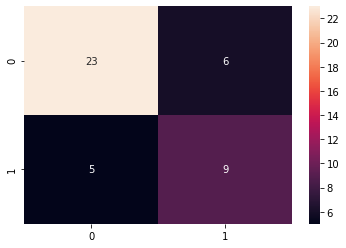

In [96]:
from sklearn.metrics import accuracy_score
print("Percentile Accuracy of Gradient Boosting is: " , accuracy_score(y_test, y_pred)*100)
sns.heatmap(data = confusion_matrix(y_test,y_pred),annot = True)

In [97]:
tempResults = pd.DataFrame({'Algorithm':['Gradient Boosting Classifier'], 'Accuracy':[accuracy_score(y_test, y_pred)]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision Tree Classifier,0.767442
0,Random Forest Classifier Method,0.837209
0,Support Vector Machines,0.720930
0,Logistic Regression,0.697674
0,Gradient Boosting Classifier,0.744186


### 6. K-Nearest Neighbors 

In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [99]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

Percentile Accuracy of K-Nearest Neighbours is:  74.4186046511628


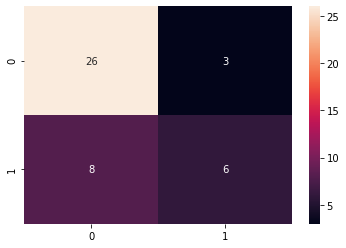

In [100]:
from sklearn.metrics import accuracy_score
print("Percentile Accuracy of K-Nearest Neighbours is: " , accuracy_score(y_test, y_pred)*100)
sns.heatmap(data = confusion_matrix(y_test,y_pred),annot = True)

In [101]:
tempResults = pd.DataFrame({'Algorithm':['K-Nearest Neighbors'], 'Accuracy':[accuracy_score(y_test, y_pred)]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision Tree Classifier,0.767442
0,Random Forest Classifier Method,0.837209
0,Support Vector Machines,0.720930
0,Logistic Regression,0.697674
0,Gradient Boosting Classifier,0.744186
0,K-Nearest Neighbors,0.744186


### 7. K-Means Algorithm 

In [102]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=2, random_state=0)

k_means.fit(X_train,y_train)

KMeans(n_clusters=2, random_state=0)

In [103]:
y_pred = k_means.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Percentile Accuracy of K Means Algorithm is:  74.4186046511628


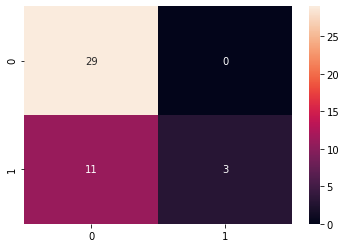

In [104]:
from sklearn.metrics import accuracy_score
print("Percentile Accuracy of K Means Algorithm is: " , accuracy_score(y_test, y_pred)*100)
sns.heatmap(data = confusion_matrix(y_test,y_pred),annot = True)

In [105]:
tempResults = pd.DataFrame({'Algorithm':['K-Means Algorithm'], 'Accuracy':[accuracy_score(y_test, y_pred)]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision Tree Classifier,0.767442
0,Random Forest Classifier Method,0.837209
0,Support Vector Machines,0.720930
0,Logistic Regression,0.697674
0,Gradient Boosting Classifier,0.744186
0,K-Nearest Neighbors,0.744186
0,K-Means Algorithm,0.744186


## Deep Learning - Artificial Neural Networks (ANN) 

### 1. Single Layered Perceptron 

In [106]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-1, random_state=0,alpha=0.0025)

clf.fit(X_train, y_train)

Perceptron(alpha=0.0025, tol=0.1)

In [107]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1],
      dtype=int64)

Percentile Accuracy of Single Layered Perceptron is:  67.44186046511628


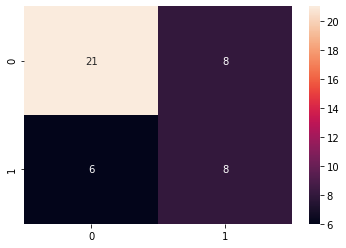

In [108]:
from sklearn.metrics import accuracy_score
print("Percentile Accuracy of Single Layered Perceptron is: " , accuracy_score(y_test, y_pred)*100)
sns.heatmap(data = confusion_matrix(y_test,y_pred),annot = True)

In [109]:
tempResults = pd.DataFrame({'Algorithm':['Single layered Perceptron'], 'Accuracy':[accuracy_score(y_test, y_pred)]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision Tree Classifier,0.767442
0,Random Forest Classifier Method,0.837209
0,Support Vector Machines,0.720930
0,Logistic Regression,0.697674
0,Gradient Boosting Classifier,0.744186
0,K-Nearest Neighbors,0.744186
0,K-Means Algorithm,0.744186
0,Single layered Perceptron,0.674419


### 2. Multi-layered Perceptron 

In [110]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(128,128),max_iter=400, random_state=0)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(128, 128), max_iter=400, random_state=0)

In [111]:
y_pred = mlp.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
      dtype=int64)

Percentile Accuracy of Single Layered Perceptron is:  79.06976744186046


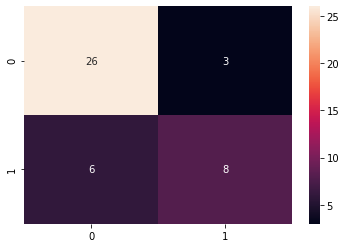

In [112]:
from sklearn.metrics import accuracy_score
print("Percentile Accuracy of Single Layered Perceptron is: " , accuracy_score(y_test, y_pred)*100)
sns.heatmap(data = confusion_matrix(y_test,y_pred),annot = True)

In [113]:
tempResults = pd.DataFrame({'Algorithm':['Multi layered Perceptron'], 'Accuracy':[accuracy_score(y_test, y_pred)]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision Tree Classifier,0.767442
0,Random Forest Classifier Method,0.837209
0,Support Vector Machines,0.720930
0,Logistic Regression,0.697674
0,Gradient Boosting Classifier,0.744186
0,K-Nearest Neighbors,0.744186
0,K-Means Algorithm,0.744186
0,Single layered Perceptron,0.674419
0,Multi layered Perceptron,0.790698


In [114]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
classifier = input(color.BOLD + "Enter the Classifier name:  " + color.END)
classifier = classifier.lower()

print("\n")
print(color.BOLD + "Question Statements: " + color.END)
q1 = float(input("Enter the No of Transactions: "))
q2 = float(input("Enter the No of Orders: "))
q3 = float(input("Enter the No of Payments: "))
q4 = float(input("Enter the Total transaction amount: "))
q5 = float(input("Enter the No of transactions Failures: "))
q6 = float(input("Enter the No of CardPayments: "))
q7 = float(input("Enter the No of BitcoinPayments: "))
q8 = float(input("Enter the No of OrdersFulfilled: "))
q9 = float(input("Enter the  American Express CardPayments:"))
q10 = float(input("Enter the VISA16 Payments: "))

outp = [[q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]]

if classifier == "logistic regression":
    
    out = lr.predict(outp)
    if out == [1]:
        print(out)
        print(color.BOLD + "Transaction Fraud Detected!" + color.END)
    elif out == [0]:
        print(out)
        print(color.BOLD + "Transaction Safe!" + color.END)
        
elif classifier == "kmeans":
    
    out = k_means.predict(outp)
    if out == [1]:
        print(out)
        print(color.BOLD + "Transaction Fraud Detected!" + color.END)
    elif out == [0]:
        print(out)
        print(color.BOLD + "Transaction Safe!" + color.END)
        
elif classifier == "decision tree":
    
    out = dtc.predict(outp)
    if out == [1]:
        print(out)
        print(color.BOLD + "Transaction Fraud Detected!" + color.END)
    elif out == [0]:
        print(out)
        print(color.BOLD + "Transaction Safe!" + color.END)
        
elif classifier == "knn":
    
    out = knn.predict(outp)
    if out == [1]:
        print(out)
        print(color.BOLD + "Transaction Fraud Detected!" + color.END)
    elif out == [0]:
        print(out)
        print(color.BOLD + "Transaction Safe!" + color.END)
        
elif classifier == "random forest":
    
    out = rfc.predict(outp)
    if out == [1]:
        print(out)
        print(color.BOLD + "Transaction Fraud Detected!" + color.END)
    elif out == [0]:
        print(out)
        print(color.BOLD + "Transaction Safe!" + color.END)
        
elif classifier == "gradient boosting":
    
    out = gbc.predict(outp)
    if out == [1]:
        print(out)
        print(color.BOLD + "Transaction Fraud Detected!" + color.END)
    elif out == [0]:
        print(out)
        print(color.BOLD + "Transaction Safe!" + color.END)
        
elif classifier == "svm":
    
    out = svc.predict(outp)
    if out == [1]:
        print(out)
        print(color.BOLD + "Transaction Fraud Detected!" + color.END)
    elif out == [0]:
        print(out)
        print(color.BOLD + "Transaction Safe!" + color.END)
        
elif classifier == "perceptron":
    
    out = clf.predict(outp)
    if out == [1]:
        print(out)
        print(color.BOLD + "Transaction Fraud Detected!" + color.END)
    elif out == [0]:
        print(out)
        print(color.BOLD + "Transaction Safe!" + color.END)
        
elif classifier == "mlp":
    
    out = mlp.predict(outp)
    if out == [1]:
        print(out)
        print(color.BOLD + "Transaction Fraud Detected!" + color.END)
    elif out == [0]:
        print(out)
        print(color.BOLD + "Transaction Safe!" + color.END)
        

        


Enter the Classifier name:  LOGISTIC REGRESSION


Question Statements: 
Enter the No of Transactions: 1
Enter the No of Orders: 0
Enter the No of Payments: 1
Enter the Total transaction amount: 0
Enter the No of transactions Failures: 11
Enter the No of CardPayments: 1
Enter the No of BitcoinPayments: 0
Enter the No of OrdersFulfilled: 1
Enter the  American Express CardPayments:0
Enter the VISA16 Payments: 1
[0]
Transaction Safe!
